### Covering basics of tensorflow, tensors etc

In [ ]:
### intro to tensors
### getting info from tensors
### manipulating tensors
### tensors & numpy
### using @tf.function (way to speed up regular python functions)
### using GPU/TPU's with tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
# creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# check no of dimensions in a tensor
scalar.ndim

0

In [5]:
# create a vector
vector = tf.constant([10,10])
vector.ndim

1

In [6]:
# create a matrix
matrix = tf.constant([[10,7], [7,10]])
matrix.ndim

2

In [7]:
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [8]:
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [9]:
another_matrix = tf.constant([[11.1, 32.4], [10., 7.]])
another_matrix

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[11.1, 32.4],
       [10. ,  7. ]], dtype=float32)>

In [10]:
another_matrix.ndim

2

In [11]:
another_matrix1 = tf.constant([[11.5, 39.7], [10., 7.]], dtype = tf.float16)
another_matrix1

<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
array([[11.5, 39.7],
       [10. ,  7. ]], dtype=float16)>

In [12]:
tensor = tf.constant([[[1,2,3,],
                      [4,5,6]],
                      [[66,14,10],
                      [20,23,18]],
                      [[9,10,12],
                      [11,13,15]]])

In [13]:
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[66, 14, 10],
        [20, 23, 18]],

       [[ 9, 10, 12],
        [11, 13, 15]]], dtype=int32)>

In [14]:
tensor.ndim

3

In [15]:
# scalar - single num
# vector - number with direction e.g wind speed & direction
# matrix - 2 dimensional array of numbers
# tensor - an n-dimensional array of numbers where n can be any number, a 0-dimensional tensor is a scalar, 1 dim tensor is a vector

In [16]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [17]:
# create the same tensor with the tf.variable as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,10])

In [18]:
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [19]:
unchangeable_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [20]:
# cannot use assign or change the unchangeable tensor (tf.constant)
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Rarely in practise do you use tf.constant or tf.variable (already done for you). If in doubt use tf.constant and change later though

### Creating Random Tensors

In [21]:
### create two random but the same tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape = (3,2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [22]:
random_2 = tf.random.Generator.from_seed(42)
# pseudo random numbers as we set seed
random_2 = random_2.normal(shape = (3,2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [23]:
random_1 == random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

### Shuffling Orders of a tensor

In [24]:
# shuffle a tensor
# valuable for when you want to shuffle your data, order doesnt affect learning
not_shuffled = tf.constant([[10,7],
                            [11,12],
                            [5, 6]])

In [25]:
not_shuffled.ndim

2

In [26]:
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 12],
       [10,  7],
       [ 5,  6]], dtype=int32)>

In [27]:
### same order everytime - global seed same as operational
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42)

## as per "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [11, 12],
       [ 5,  6]], dtype=int32)>

### Turn Numpy arrays into tensors
The main diff between numpy arrays and TF tensors is that tensors can be run on a GPU (much faster).

In [28]:
import numpy as np
numpy_A = np.arange(1, 25, dtype = np.int32)

#X = tf.constant(some_matrix)
#y = tf.constant(vector) # non cap for vector vice versa for matrix above

In [29]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [30]:
B = tf.constant(numpy_A, shape = (2 ,3 , 4))
B

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

### Getting info from Tensors
When dealing with tensors need to be aware of these attributes:
* Shape
* Access or Dim
* Size
* Rank

In [31]:
rank_4_tensors = tf.zeros(shape = [2,3,4,5])

In [32]:
rank_4_tensors

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [33]:
rank_4_tensors.shape, rank_4_tensors.ndim, tf.size(rank_4_tensors)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

### Indexing with Tensors

Index like lists in Python.

In [34]:
rank_4_tensors[:2, :2, :2, :2]
## first two elements each dim

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [35]:
# get first element of each dim bar last
rank_4_tensors[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [36]:
### reshaping tensors
rank_2_tensor = tf.constant([[10,3],
                             [11,7]])

In [37]:
rank_2_tensor.shape

TensorShape([2, 2])

In [38]:
rank_2_tensor.ndim

2

In [39]:
## add extra dim to our dim2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
### ... means every prev axis Instead of multiple :, : so forth

In [40]:
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 3]],

       [[11],
        [ 7]]], dtype=int32)>

In [41]:
tf.expand_dims(rank_2_tensor, axis = 1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  3]],

       [[11,  7]]], dtype=int32)>

In [42]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  3],
       [11,  7]], dtype=int32)>

### Manipulation of Tensors

Indexing etc

**Basic Operations**
+, -, /, *

In [43]:
basic = tf.constant([[10,7], [3,4]])
basic + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [44]:
# element wise
tf.multiply(basic, 5)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50, 35],
       [15, 20]], dtype=int32)>

## Matrix Multiplication

There are two rules tensors must follow for matrix mul.:

1.) The inner dimensions must match.
2.) The resulting matrix has the shape of the inner dimensions.

In [45]:
tf.linalg.matmul(basic, rank_2_tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[177,  79],
       [ 74,  37]], dtype=int32)>

In [46]:
basic @ rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[177,  79],
       [ 74,  37]], dtype=int32)>

### Lets change shape of tensor

In [47]:
vals = tf.constant([[1,2],
             [4,5],
             [7,8]])

In [48]:
tf.reshape(vals, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 4],
       [5, 7, 8]], dtype=int32)>

In [49]:
X = tf.constant([[10,11,],
                 [13,14],
                 [16,17]])
X.shape

TensorShape([3, 2])

In [50]:
X @ tf.reshape(vals, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 65,  97, 128],
       [ 83, 124, 164],
       [101, 151, 200]], dtype=int32)>

In [51]:
## reshape other
tf.matmul(tf.reshape(X, shape=(2,3)), vals)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[145, 179],
       [197, 244]], dtype=int32)>

In [52]:
## do same with transpose
tf.transpose(X)
## tranpose takes first of each vector instead of reshape

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10, 13, 16],
       [11, 14, 17]], dtype=int32)>

In [53]:
### try matrix mul with transpose instead of reshape
tf.matmul(tf.transpose(X), vals)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[174, 213],
       [186, 228]], dtype=int32)>

**The Dot Product**

Matrix mul also referred to as dot product, can be used using:
- tf.matmul()
- tf.tensordot()

In [54]:
## perform dot product on x and vals
## requires x or vals to be transposed
tf.tensordot(tf.transpose(X), vals, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[174, 213],
       [186, 228]], dtype=int32)>

In [55]:
tf.matmul(X, tf.transpose(vals))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 32,  95, 158],
       [ 41, 122, 203],
       [ 50, 149, 248]], dtype=int32)>

In [56]:
tf.matmul(X, tf.reshape(vals, shape = (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 65,  97, 128],
       [ 83, 124, 164],
       [101, 151, 200]], dtype=int32)>

In [57]:
## check values
print("Vals normal:")
print(vals, "\n")

print("Vals transpose:")
print(tf.transpose(vals), "\n")

print("Vals Reshape:")
print(tf.reshape(vals, shape = (2,3)))

Vals normal:
tf.Tensor(
[[1 2]
 [4 5]
 [7 8]], shape=(3, 2), dtype=int32) 

Vals transpose:
tf.Tensor(
[[1 4 7]
 [2 5 8]], shape=(2, 3), dtype=int32) 

Vals Reshape:
tf.Tensor(
[[1 2 4]
 [5 7 8]], shape=(2, 3), dtype=int32)


**Generally wil transpose instead of reshape if a tensor needs to be reshaped for matrix multiplication**

### Changing Data Types of Tensors

In [58]:
change = tf.constant([[3,4],
                      [7,11]])
change.dtype

tf.int32

In [59]:
change1 = tf.constant([[1.3,5.4],
                      [7.55,11.7]])
change1.dtype

tf.float32

In [60]:
### change from float32 to float16
change1 = tf.cast(change1, dtype = tf.float16)
change1.dtype

tf.float16

In [61]:
change1_int = tf.cast(change1, dtype = tf.int32)
change1_int, change1_int.dtype

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 1,  5],
        [ 7, 11]], dtype=int32)>,
 tf.int32)

### Aggregating Tensors

Aggregating tensors means condensing them from multiple values into a smaller number of values

In [62]:
l = tf.constant([[-8, -9],
                 [-3, -77]])
tf.abs(l)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 8,  9],
       [ 3, 77]], dtype=int32)>

### Lets look at following methods of aggregation of a tensor

- max
- min
- mean
- sum

In [63]:
## create random tensor
tfff = tf.constant(np.random.randint(0, 75, size = 50))

In [64]:
tfff

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([71, 35, 64, 45, 35, 51, 53, 53,  0,  6, 61, 72, 31, 72, 33, 18, 40,
        9, 14, 51,  1, 23, 13, 73, 10, 22, 31, 67, 32, 21, 56, 20,  8, 68,
       63, 34, 53, 47, 44, 12, 71, 52, 24, 68, 14,  7, 49, 36, 17,  9])>

In [65]:
tf.size(tfff), tfff.shape, tfff.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [66]:
## min
tf.reduce_min(tfff)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [67]:
### max
tf.reduce_max(tfff)

<tf.Tensor: shape=(), dtype=int64, numpy=73>

In [68]:
### mean
tf.reduce_mean(tfff)

<tf.Tensor: shape=(), dtype=int64, numpy=37>

In [69]:
## sum
tf.reduce_sum(tfff)

<tf.Tensor: shape=(), dtype=int64, numpy=1859>

In [70]:
### variance
import tensorflow_probability as tfp
tfp.stats.variance(
    tfff
)

<tf.Tensor: shape=(), dtype=int64, numpy=498>

In [71]:
### standard dev
np.std(
    tfff
)

22.325492155829398

### Positional Max/Min of Tensor

In [72]:
## create new tensor
tf.random.set_seed(42)
find_max = tf.random.uniform(shape = [50])
find_max

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [73]:
tf.argmax(find_max) # positional max

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [74]:
find_max[tf.argmax(find_max)] # gets value from where index is max

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [75]:
tf.reduce_max(find_max) # same as cell directly above

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [76]:
tf.argmin(find_max) # minimum

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [77]:
find_max[tf.argmin(find_max)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing Tensors

Removing all 1-dim

In [78]:
## create new tensor
tf.random.set_seed(42)
squeeze = tf.constant(tf.random.uniform(shape = [50]), shape = (1,1,1,1, 50))
squeeze

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [79]:
squeeze.shape

TensorShape([1, 1, 1, 1, 50])

In [80]:
squeezed = tf.squeeze(squeeze)
squeezed.shape

TensorShape([50])

### One-hot Encoding Tensors

In [81]:
some_list = [0, 1, 2, 3, 5] #could be diff colours

## one-hot encode
tf.one_hot(some_list, depth = len(some_list))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

### Trying out more Tensor Operations

In [82]:
## squaring log, n, square root
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [83]:
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [84]:
tf.sqrt(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [85]:
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensorflow and Numpy Compatibility

TF interacts well with Numpy arrays.

In [86]:
import numpy as np

In [87]:
# create tensor from numpy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [88]:
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [89]:
# convert tensor j to numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [90]:
J = tf.constant([3.])
J.numpy()[0]

3.0

In [91]:
## default types of each slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

In [92]:
#### NOTE Tensorflow tensors can be run on GPU/TPU's, numpy array can't
#### (faster numerical processing)

### Finding Access to GPU's

In [93]:
tf.config.list_physical_devices()
#tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [94]:
## CUDA GPU -> Tensorflow will use this automatically

## 🛠 00. TensorFlow Fundamentals Exercises

In [95]:
vec = tf.constant([1,2])
mat = tf.constant([[1,2,3], [4,5,6]])
tens = tf.constant([[[1,2,3,],
                      [4,5,6]],
                      [[66,14,10],
                      [20,23,18]],
                      [[9,10,12],
                      [11,13,15]]])

## TF Neural Net Regression

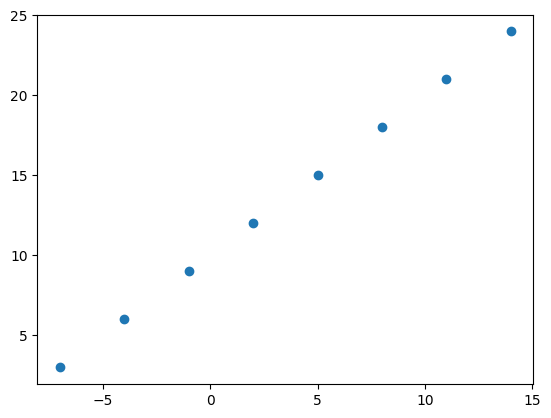

In [96]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7, -4, -1, 2, 5, 8, 11, 14])

y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

plt.scatter(x, y)

In [97]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [98]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [99]:
x[0].ndim
## scalar tensors

0

In [100]:
## turn our numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [101]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Modelling Steps in Tensorflow

In [102]:
tf.random.set_seed(42)
# 1. create model
model = tf.keras.Sequential([
    #dense(1) as take 1 input and predict 1 number
    tf.keras.layers.Dense(1)
    ])

In [103]:
#2. compile model
model.compile(loss = tf.keras.losses.mae, # mean absolute error (like standard ML metrics)
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) ## stochastic gradient descent

# 3. fit model
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])

y = np.array([3, 6, 9, 12, 15, 18, 21, 24])
## epochs -> 5 laps , go over x and y 5 times to figure out patterns
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.9742 - mae: 19.9742
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 19.6929 - mae: 19.6929
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 19.4117 - mae: 19.4117
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 19.1304 - mae: 19.1304
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 18.8492 - mae: 18.8492


In [104]:
#model.predict([17])

## Improving Models

In [105]:
## loss - how wrong your models predictions are compared to truth labels (minimize this)
## optimizer - how your model updates its internal patterns to better its predictions.
## metrics - human interpretable values for how well your model is doing

### Imrpove model steps

1. **creating a model** - add more layers, more hidden layers (neurons, within each of these layers), change activation functions.
2. **compiling model** - here change optimization function or learning rate (hyperparameter).
3. **fitting a model** - fit a model for more epochs (training longer) or more data.

In [106]:
### adam optimizer lr , higher lr adam optimizes pushes model to improve in optimizer section

In [107]:
## create model again

# same layers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

# more epochs
model1.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.5942 - mae: 14.5942
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 14.4617 - mae: 14.4617
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 14.3292 - mae: 14.3292
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 14.1967 - mae: 14.1967
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 14.0642 - mae: 14.0642
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 13.9317 - mae: 13.9317
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 13.7992 - mae: 13.7992
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 13.6667 - mae: 13.6667
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 13.5342 - mae: 13.5342
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 13.4017 - mae: 13.4017
Epoch 11/100
1/1 [==============================] -

In [108]:
## much more accurate
model1.predict([17])

1/1 [==============================] - 0s 243ms/step


array([[29.493011]], dtype=float32)

In [109]:
### lets further improve the model
# extra hidden layer

model2 = tf.keras.Sequential([
    # extra layer added
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

# results much improved
model2.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 470ms/step - loss: 16.7831 - mae: 16.7831
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 16.3068 - mae: 16.3068
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 15.8604 - mae: 15.8604
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 15.4394 - mae: 15.4394
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 15.0398 - mae: 15.0398
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 14.6577 - mae: 14.6577
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 14.2908 - mae: 14.2908
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9501 - mae: 13.9501
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 13.6325 - mae: 13.6325
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 13.2843 - mae: 13.2843
Epoch 11/100
1/1 [==============================

In [110]:
model2.predict([17])
# should be 27, so worse than previous model
# suggests overfitting this output

1/1 [==============================] - 0s 74ms/step


array([[32.706375]], dtype=float32)

In [111]:
# change optimizer in compile to adam now
model3 = tf.keras.Sequential([
    # extra layer added
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

# results much improved
model3.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.6367 - mae: 15.6367
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 15.6089 - mae: 15.6089
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 15.5811 - mae: 15.5811
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 15.5533 - mae: 15.5533
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 15.5256 - mae: 15.5256
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.4979 - mae: 15.4979
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 15.4703 - mae: 15.4703
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 15.4427 - mae: 15.4427
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 15.4151 - mae: 15.4151
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 15.3876 - mae: 15.3876
Epoch 11/100
1/1 [==============================] -

In [113]:
model3.predict([17])
## adam works badly here, worse results for epochs and unseen example

1/1 [==============================] - 0s 133ms/step


array([[-0.7589299]], dtype=float32)

In [118]:
# change learning rate for adam optimizer now
model4 = tf.keras.Sequential([
    # extra layer added
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ['mae'])

# results much improved
model4.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.4300 - mae: 19.4300
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 19.3970 - mae: 19.3970
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 19.3640 - mae: 19.3640
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 19.3311 - mae: 19.3311
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 19.2982 - mae: 19.2982
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 19.2653 - mae: 19.2653
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 19.2325 - mae: 19.2325
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 19.1998 - mae: 19.1998
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 19.1670 - mae: 19.1670
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 19.1343 - mae: 19.1343
Epoch 11/100
1/1 [==============================] -

In [119]:
model4.predict([17])
# big improvement on previous but still little under 10 off
# lr potentially most important hyperparameter in NN

1/1 [==============================] - 0s 124ms/step


array([[-14.667562]], dtype=float32)

## Evaluating a Model

In practise, typical TF NN workflow:

- Build model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate and repeat.

## Visualize

- training data
- the model itself
- the training of a model  - how does a model perform as it learns?
- the predictions of a model (against original labels)

In [120]:
## make bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [121]:
# make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

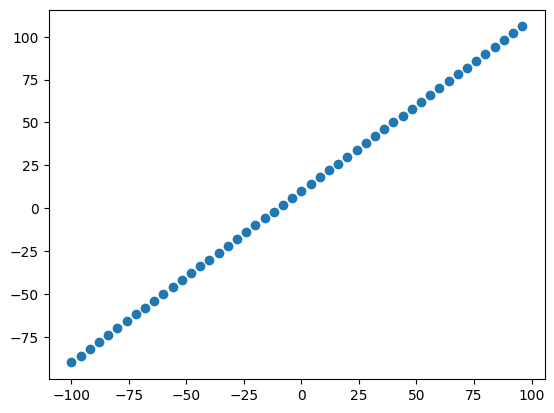

In [123]:
plt.scatter(X, y)

In [127]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

40
10
40
10


### 3 sets of data

- Train - typically 70-80% data.
- Validation - model gets tuned on this data, typically 10-15% data available.
- Test - model evaluated on this data to evaluate what it has learned, typically 10-15% of total data.

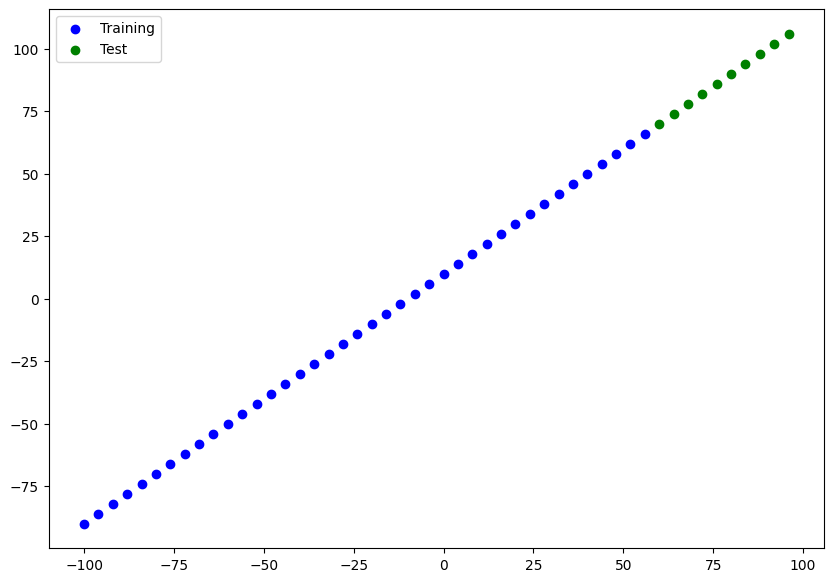

In [130]:
## visualize train/test now
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = "Training")
plt.scatter(X_test, y_test, c = "g", label = "Test")
plt.legend()

In [132]:
## lets create a NN

model_split = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

model_split.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.SGD(),
                    metrics = ["mae"])

model_split.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 1s 13ms/step - loss: 37.6769 - mae: 37.6769
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 34.5308 - mae: 34.5308
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 31.4867 - mae: 31.4867
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 28.6810 - mae: 28.6810
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 26.0800 - mae: 26.0800
Epoch 6/10
2/2 [==============================] - 0s 26ms/step - loss: 23.7176 - mae: 23.7176
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 21.6592 - mae: 21.6592
Epoch 8/10
2/2 [==============================] - 0s 18ms/step - loss: 19.6889 - mae: 19.6889
Epoch 9/10
2/2 [==============================] - 0s 36ms/step - loss: 17.7049 - mae: 17.7049
Epoch 10/10
2/2 [==============================] - 0s 36ms/step - loss: 16.1354 - mae: 16.1354
